In [22]:
import numpy as np, pandas as pd, random, matplotlib.pyplot as plt

In [238]:
r = random.Random()
#set up parameters for simulation
mu_q_th=2
sig_q_th=1

h1_p_sig= .3;
h2_p_sig= .3;

dct={f"{a}_{b}" :[] for a in "q h1 h2 s n".split() for b in "xyz"}
for i in range(100000):
    q_th=abs(r.gauss(mu_q_th, sig_q_th))#arbitrary function
    q_ph=r.uniform(0,np.pi*2)
    q_x=np.cos(q_ph)*np.sin(q_th)
    q_y=np.sin(q_ph)*np.sin(q_th)
    q_z=np.cos(q_th)
    
    
    
    q_t=np.hypot(q_x, q_y)
    
    s_x =-q_z*q_x/q_t
    s_y =-q_z*q_y/q_t
    s_z = q_t
    
    n_x=q_y*s_z-q_z*s_y
    n_y=q_z*s_x-q_x*s_z
    n_z=q_x*s_y-q_y*s_x
    
    h1_x=r.gauss(0, h1_p_sig)+q_x
    h1_y=r.gauss(0, h1_p_sig)+q_y
    h1_z=r.gauss(0, h1_p_sig)+q_z
    
    h2_x=r.gauss(0, h2_p_sig)+q_x
    h2_y=r.gauss(0, h2_p_sig)+q_y
    h2_z=r.gauss(0, h2_p_sig)+q_z
    
    #create an acceptance effect only on the h1
    #if h1_z/np.hypot(h1_x,h1_y)<-.5 or h1_z/np.hypot(h1_x,h1_y)>0.7:
    #    continue
    
    dct['q_x'].append(q_x)
    dct['q_y'].append(q_y)
    dct['q_z'].append(q_z)
    dct['s_x'].append(s_x)
    dct['s_y'].append(s_y)
    dct['s_z'].append(s_z)
    
    dct['n_x'].append(n_x)
    dct['n_y'].append(n_y)
    dct['n_z'].append(n_z)
    
    dct["h1_x"].append(h1_x)
    dct["h1_y"].append(h1_y)
    dct["h1_z"].append(h1_z)
    
    dct["h2_x"].append(h2_x)
    dct["h2_y"].append(h2_y)
    dct["h2_z"].append(h2_z)
              
df=pd.DataFrame(dct)



In [239]:
#check that the s n and l are orthonormal
for a in "snq":
    for b in "snq":
        print(a,b,"%.5f"%np.mean(df.eval(f"{a}_x*{b}_x+{a}_y*{b}_y+{a}_z*{b}_z")),"%.5f"% np.std(df.eval(f"{a}_x*{b}_x+{a}_y*{b}_y+{a}_z*{b}_z")))

s s 1.00000 0.00000
s n -0.00000 0.00000
s q 0.00000 0.00000
n s -0.00000 0.00000
n n 1.00000 0.00000
n q -0.00000 0.00000
q s 0.00000 0.00000
q n -0.00000 0.00000
q q 1.00000 0.00000


In [240]:
def phi12(i, j):
    nx=df.n_x[i]
    ny=df.n_y[i]
    nz=df.n_z[i]
    sx=df.s_x[i]
    sy=df.s_y[i]
    sz=df.s_z[i]
    
    h1x=df.h1_x[i]
    h1y=df.h1_y[i]
    h1z=df.h1_z[i]
    h2x=df.h2_x[j]
    h2y=df.h2_y[j]
    h2z=df.h2_z[j]
    
    phi1 = np.arctan2(h1x*nx+h1y*ny+h1z*nz, h1x*sx+h1y*sy+h1z*sz)
    phi2 = np.arctan2(h2x*nx+h2y*ny+h2z*nz, h2x*sx+h2y*sy+h2z*sz)
    dphi= phi1-phi2
    if dphi>np.pi:
        dphi -= 2*np.pi
    if dphi<-np.pi:
        dphi += 2*np.pi
    return phi1, phi2, dphi
        
    

In [241]:
def pt2(i,j):
    h2x=df.h2_x[j]
    h2y=df.h2_y[j]
    h2z=df.h2_z[j]
    qx=df.q_x[i]
    qy=df.q_y[i]
    qz=df.q_z[i]
    return np.sqrt(h2x**2+h2y**2+h2z**2-(qx*h2x+qy*h2y+qz*h2z)**2)
def pt1(i):
    h1x=df.h1_x[i]
    h1y=df.h1_y[i]
    h1z=df.h1_z[i]
    qx=df.q_x[i]
    qy=df.q_y[i]
    qz=df.q_z[i]
    return np.sqrt(h1x**2+h1y**2+h1z**2-(qx*h1x+qy*h1y+qz*h1z)**2)
    

In [242]:
dphis=[]
pt2s = []
pt1s = []
phi1s = []
phi2s = []
a={}
for i in range(len(df)):
    for j in range(i+1, min(len(df), i+11)):
        pt2s.append(pt2(i,j))
        phis=phi12(i,j)
        phi1s.append(phis[0])
        phi2s.append(phis[1])
        dphis.append(phis[2])
        pt1s.append(pt1(i))
        for k in df.columns:
            if k not in a.keys():
                a[k]=[]
            a[k].append(df[k][i])

In [243]:
df2=pd.DataFrame(dict(dphi=dphis, pt2=pt2s, pt1=pt1s, phi1=phi1s, phi2=phi2s,**a))

In [244]:
print(df2.columns)

Index(['dphi', 'pt2', 'pt1', 'phi1', 'phi2', 'q_x', 'q_y', 'q_z', 'h1_x',
       'h1_y', 'h1_z', 'h2_x', 'h2_y', 'h2_z', 's_x', 's_y', 's_z', 'n_x',
       'n_y', 'n_z'],
      dtype='object')


0.19342584198863447


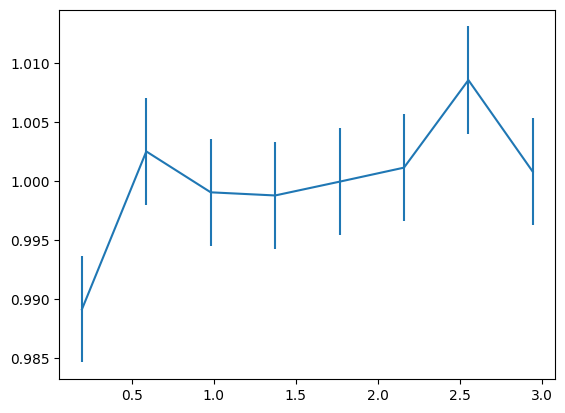

In [245]:
y,x=np.histogram(df2.query("pt2>.2 and pt1>.2").dphi, bins=8, range=(0, np.pi))
from scipy.stats import chi2

y, dy= y*len(y)/sum(y), np.sqrt(y)*len(y)/sum(y)
print(chi2.sf(sum((y-1)**2/dy**2),7))
plt.errorbar((x[:-1]+x[1:])/2, y,dy)
plt.show()

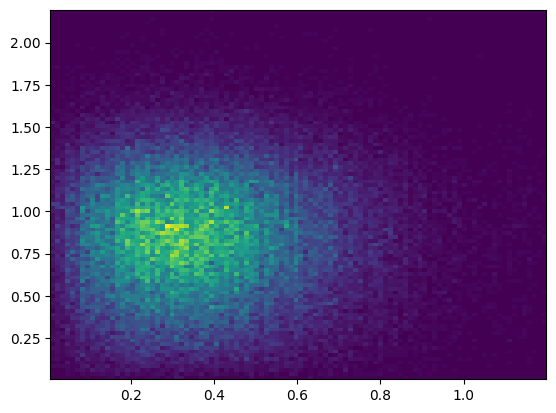

In [153]:
plt.hist2d(df2.pt1, df2.pt2, bins=100)
plt.show()

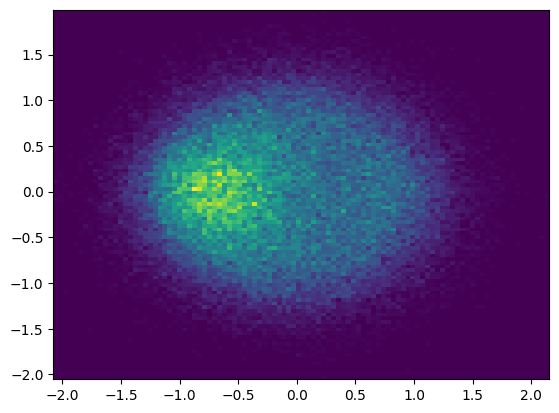

In [129]:
plt.hist2d(df2.eval("cos(phi2)*pt2"), df2.eval("sin(phi2)*pt2"),bins=100)
plt.show()

In [ ]:
#version 2: create a single particle df, and then create mixed events from it.  

In [215]:
r = random.Random()
#set up parameters for simulation
def createDF(mu_q_th=2, sig_q_th=1, h_p_sig=.3, N=100):

    dct={f"{a}_{b}" :[] for a in "q h s n".split() for b in "xyz"}
    for i in range(N):
        q_th=abs(r.gauss(mu_q_th, sig_q_th))#arbitrary function
        q_ph=r.uniform(0,np.pi*2)
        q_x=np.cos(q_ph)*np.sin(q_th)
        q_y=np.sin(q_ph)*np.sin(q_th)
        q_z=np.cos(q_th)

        q_t=np.hypot(q_x, q_y)

        s_x =-q_z*q_x/q_t
        s_y =-q_z*q_y/q_t
        s_z = q_t

        n_x=q_y*s_z-q_z*s_y
        n_y=q_z*s_x-q_x*s_z
        n_z=q_x*s_y-q_y*s_x

        h_x=r.gauss(0, h_p_sig)+q_x
        h_y=r.gauss(0, h_p_sig)+q_y
        h_z=r.gauss(0, h_p_sig)+q_z


        dct['q_x'].append(q_x)
        dct['q_y'].append(q_y)
        dct['q_z'].append(q_z)
        dct['s_x'].append(s_x)
        dct['s_y'].append(s_y)
        dct['s_z'].append(s_z)

        dct['n_x'].append(n_x)
        dct['n_y'].append(n_y)
        dct['n_z'].append(n_z)

        dct["h_x"].append(h_x)
        dct["h_y"].append(h_y)
        dct["h_z"].append(h_z)


    df=pd.DataFrame(dct)
    return df


In [253]:
def phi12(df1, df2, i, j):
    nx=df1.n_x[i]
    ny=df1.n_y[i]
    nz=df1.n_z[i]
    sx=df1.s_x[i]
    sy=df1.s_y[i]
    sz=df1.s_z[i]
    
    h1x=df1.h_x[i]
    h1y=df1.h_y[i]
    h1z=df1.h_z[i]
    h2x=df2.h_x[j]
    h2y=df2.h_y[j]
    h2z=df2.h_z[j]
    
    phi1 = np.arctan2(h1x*nx+h1y*ny+h1z*nz, h1x*sx+h1y*sy+h1z*sz)
    phi2 = np.arctan2(h2x*nx+h2y*ny+h2z*nz, h2x*sx+h2y*sy+h2z*sz)
    dphi= phi1-phi2
    if dphi>np.pi:
        dphi -= 2*np.pi
    if dphi<-np.pi:
        dphi += 2*np.pi
    return phi1, phi2, dphi
        
    

In [251]:
def pt2(df1,df2, i,j):
    h2x=df2.h_x[j]
    h2y=df2.h_y[j]
    h2z=df2.h_z[j]
    qx=df1.q_x[i]
    qy=df1.q_y[i]
    qz=df1.q_z[i]
    return np.sqrt(h2x**2+h2y**2+h2z**2-(qx*h2x+qy*h2y+qz*h2z)**2)

def pt1(df1, i):
    h1x=df1.h_x[i]
    h1y=df1.h_y[i]
    h1z=df1.h_z[i]
    qx=df1.q_x[i]
    qy=df1.q_y[i]
    qz=df1.q_z[i]
    return np.sqrt(h1x**2+h1y**2+h1z**2-(qx*h1x+qy*h1y+qz*h1z)**2)
    

In [246]:
def checkDF(df):
    for a in "snq":
        for b in "snq":
            print(a,b,"%.5f"%np.mean(df.eval(f"{a}_x*{b}_x+{a}_y*{b}_y+{a}_z*{b}_z")),"%.5f"% np.std(df.eval(f"{a}_x*{b}_x+{a}_y*{b}_y+{a}_z*{b}_z")))

In [258]:
df1 = createDF(N=10000)
df2 = createDF(N=10000)
#checkDF(df1)
#checkDF(df2)

In [295]:

def makeMixedDF(df1, df2, cond1=(lambda df,i: True), cond2=(lambda df,i:True)):
    dphis=[]
    pt2s = []
    pt1s = []
    phi1s = []
    phi2s = []
    a={}
    for i in range(len(df1)):
        if not cond1(df1, i):
            continue
        for j in range(i, min(i+11, len(df2))):
            if not cond2(df2, j):
                continue
            pt2s.append(pt2(df1, df2, i,j))
            phis=phi12(df1, df2, i,j)
            phi1s.append(phis[0])
            phi2s.append(phis[1])
            dphis.append(phis[2])
            pt1s.append(pt1(df1, i))
            for k in df1.columns:
                if k not in a.keys():
                    a[k]=[]
                a[k].append(df1[k][i])
        if i %100==0:
            print("progress=","%.2f%%"%(i*100/len(df1)))
    df_pair=pd.DataFrame(dict(dphi=dphis, pt2=pt2s, pt1=pt1s, phi1=phi1s, phi2=phi2s,**a))
    return df_pair

In [276]:
dfs_pair={}

In [287]:
dfs_pair['nocond']=makeMixedDF(df1, df2)

progress= 0.00%
progress= 1.00%
progress= 2.00%
progress= 3.00%
progress= 4.00%
progress= 5.00%
progress= 6.00%
progress= 7.00%
progress= 8.00%
progress= 9.00%
progress= 10.00%
progress= 11.00%
progress= 12.00%
progress= 13.00%
progress= 14.00%
progress= 15.00%
progress= 16.00%
progress= 17.00%
progress= 18.00%
progress= 19.00%
progress= 20.00%
progress= 21.00%
progress= 22.00%
progress= 23.00%
progress= 24.00%
progress= 25.00%
progress= 26.00%
progress= 27.00%
progress= 28.00%
progress= 29.00%
progress= 30.00%
progress= 31.00%
progress= 32.00%
progress= 33.00%
progress= 34.00%
progress= 35.00%
progress= 36.00%
progress= 37.00%
progress= 38.00%
progress= 39.00%
progress= 40.00%
progress= 41.00%
progress= 42.00%
progress= 43.00%
progress= 44.00%
progress= 45.00%
progress= 46.00%
progress= 47.00%
progress= 48.00%
progress= 49.00%
progress= 50.00%
progress= 51.00%
progress= 52.00%
progress= 53.00%
progress= 54.00%
progress= 55.00%
progress= 56.00%
progress= 57.00%
progress= 58.00%
progres

In [288]:
cond1= lambda df, i: df.h_z[i]/np.hypot(df.h_x[i], df.h_y[i])<.5 and df.h_z[i]/np.hypot(df.h_x[i], df.h_y[i])>-.5
dfs_pair['cond1']=makeMixedDF(df1, df2, cond1=cond1)

progress= 0.00%
progress= 4.00%
progress= 5.00%
progress= 6.00%
progress= 8.00%
progress= 11.00%
progress= 12.00%
progress= 13.00%
progress= 17.00%
progress= 19.00%
progress= 24.00%
progress= 25.00%
progress= 29.00%
progress= 32.00%
progress= 33.00%
progress= 36.00%
progress= 38.00%
progress= 39.00%
progress= 40.00%
progress= 41.00%
progress= 48.00%
progress= 49.00%
progress= 50.00%
progress= 59.00%
progress= 60.00%
progress= 64.00%
progress= 65.00%
progress= 66.00%
progress= 71.00%
progress= 74.00%
progress= 75.00%
progress= 78.00%
progress= 84.00%
progress= 90.00%
progress= 93.00%
progress= 95.00%
progress= 97.00%
progress= 98.00%


In [296]:
cond2= lambda df, i: df.h_z[i]/np.hypot(df.h_x[i], df.h_y[i])<.5 and df.h_z[i]/np.hypot(df.h_x[i], df.h_y[i])>-.5
dfs_pair['cond2']=makeMixedDF(df1, df2, cond2=cond2)

progress= 0.00%
progress= 1.00%
progress= 2.00%
progress= 3.00%
progress= 4.00%
progress= 5.00%
progress= 6.00%
progress= 7.00%
progress= 8.00%
progress= 9.00%
progress= 10.00%
progress= 11.00%
progress= 12.00%
progress= 13.00%
progress= 14.00%
progress= 15.00%
progress= 16.00%
progress= 17.00%
progress= 18.00%
progress= 19.00%
progress= 20.00%
progress= 21.00%
progress= 22.00%
progress= 23.00%
progress= 24.00%
progress= 25.00%
progress= 26.00%
progress= 27.00%
progress= 28.00%
progress= 29.00%
progress= 30.00%
progress= 31.00%
progress= 32.00%
progress= 33.00%
progress= 34.00%
progress= 35.00%
progress= 36.00%
progress= 37.00%
progress= 38.00%
progress= 39.00%
progress= 40.00%
progress= 41.00%
progress= 42.00%
progress= 43.00%
progress= 44.00%
progress= 45.00%
progress= 46.00%
progress= 47.00%
progress= 48.00%
progress= 49.00%
progress= 50.00%
progress= 51.00%
progress= 52.00%
progress= 53.00%
progress= 54.00%
progress= 55.00%
progress= 56.00%
progress= 57.00%
progress= 58.00%
progres

0.6181795283206797
0.0003472842765087035
0.7878188838951744


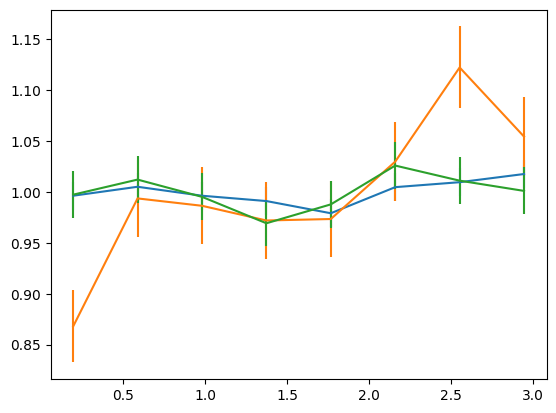

In [297]:
for k in dfs_pair:
    
    y,x=np.histogram(dfs_pair[k].query("pt2>.2 and pt1>.2").dphi, bins=8, range=(0, np.pi))
    from scipy.stats import chi2

    y, dy= y*len(y)/sum(y), np.sqrt(y)*len(y)/sum(y)
    print(chi2.sf(sum((y-1)**2/dy**2),7))
    plt.errorbar((x[:-1]+x[1:])/2, y,dy)
plt.show()